##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [9]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Dataset shapes
print(f"X_train shape: {X_train.shape}") 
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of unique classes: {num_classes}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Number of unique classes: 10


In [10]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

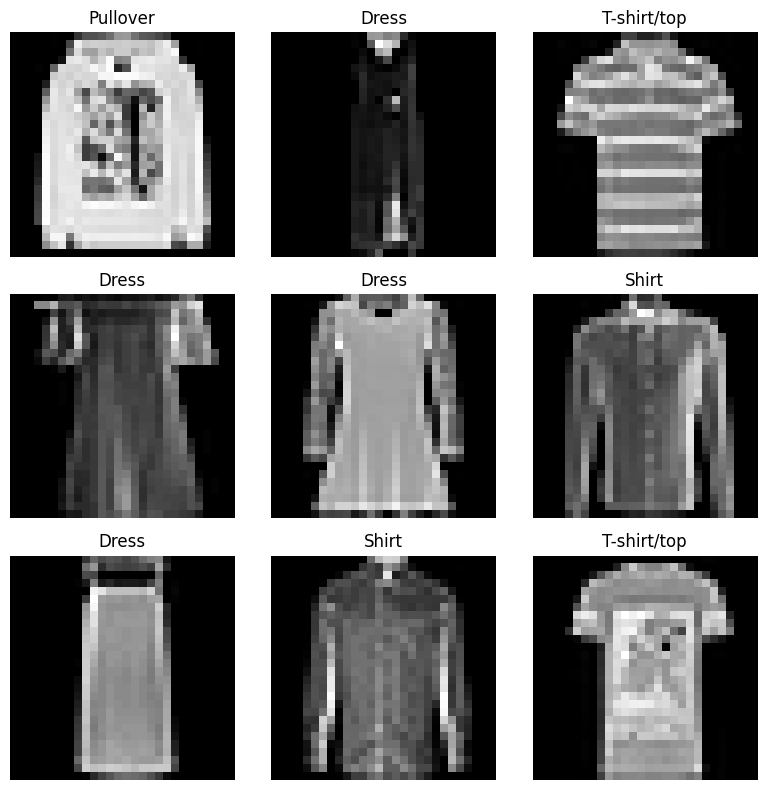

In [11]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    # Pick a random index
    idx = np.random.randint(0, len(X_train))
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

Class distribution: {'T-shirt/top': np.int64(6000), 'Trouser': np.int64(6000), 'Pullover': np.int64(6000), 'Dress': np.int64(6000), 'Coat': np.int64(6000), 'Sandal': np.int64(6000), 'Shirt': np.int64(6000), 'Sneaker': np.int64(6000), 'Bag': np.int64(6000), 'Ankle boot': np.int64(6000)}


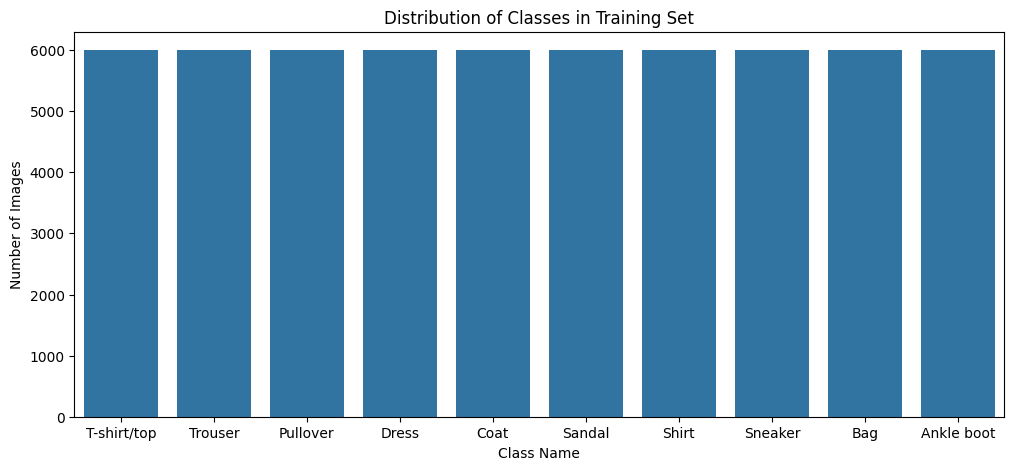

In [4]:
# Count occurrences of each class in the training set
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(class_names, counts))
print("Class distribution:", class_counts)

# Plot the class distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=class_names, y=counts)
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

In [13]:
# Check the minimum and maximum pixel values 
print(f"Minimum pixel value: {X_train.min()}")
print(f"Maximum pixel value: {X_train.max()}")

Minimum pixel value: 0
Maximum pixel value: 255


### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [14]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize pixel values for x_train and x_test
# Scaling pixels from [0, 255] to [0, 1] for better training performance
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels 
# NOTE: Don't use one hot encoding and use sparse_categorical_crossentropy for loss
# So as instructor noted, no One-hot 

# Build a CNN model
model = Sequential([
    # Input shape is (28, 28, 1) for Fashion MNIST grayscale images
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # 10 units for the 10 fashion classes
])

# Compile the model
# We use 'sparse_categorical_crossentropy' because we didn't use one-hot encoding
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# We will train for 10 epochs (you can change this number if needed)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.8194 - loss: 0.4983 - val_accuracy: 0.8601 - val_loss: 0.3752
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8812 - loss: 0.3252 - val_accuracy: 0.8796 - val_loss: 0.3351
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8977 - loss: 0.2792 - val_accuracy: 0.8948 - val_loss: 0.2884
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9085 - loss: 0.2497 - val_accuracy: 0.9058 - val_loss: 0.2667
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9172 - loss: 0.2226 - val_accuracy: 0.9019 - val_loss: 0.2604
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9243 - loss: 0.2028 - val_accuracy: 0.9118 - val_loss: 0.2460
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9314 - loss: 0.1849 - val_accuracy: 0.9037 - val_loss: 0.2655
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9378 - loss: 0.1679 - 

⏱️ Timer started! Execution begins...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Number of unique classes: 10


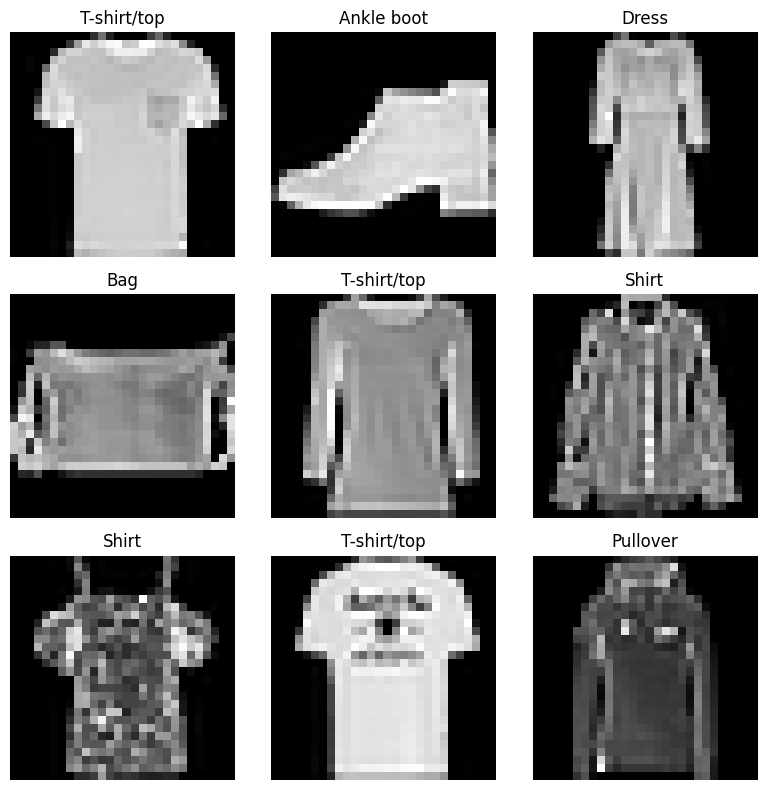

Class distribution: {'T-shirt/top': np.int64(6000), 'Trouser': np.int64(6000), 'Pullover': np.int64(6000), 'Dress': np.int64(6000), 'Coat': np.int64(6000), 'Sandal': np.int64(6000), 'Shirt': np.int64(6000), 'Sneaker': np.int64(6000), 'Bag': np.int64(6000), 'Ankle boot': np.int64(6000)}


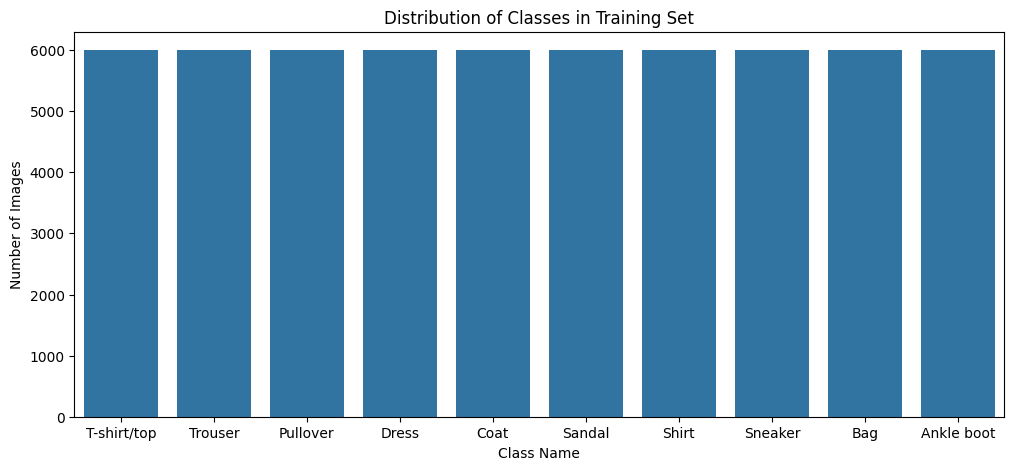

Minimum pixel value: 0
Maximum pixel value: 255


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7508 - loss: 0.6969 - val_accuracy: 0.8483 - val_loss: 0.3965
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8794 - loss: 0.3303 - val_accuracy: 0.8802 - val_loss: 0.3365
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8976 - loss: 0.2853 - val_accuracy: 0.8922 - val_loss: 0.2969
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9101 - loss: 0.2479 - val_accuracy: 0.9041 - val_loss: 0.2651
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9191 - loss: 0.2196 - val_accuracy: 0.9028 - val_loss: 0.2647
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9246 - loss: 0.2019 - val_accuracy: 0.9091 - val_loss: 0.2656
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9339 - loss: 0.1785 - val_accuracy: 0.9090 - val_loss: 0.2576
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9398 - loss: 0.1614 - val_accuracy: 0

In [1]:
# -------------------------------------------------------------------------
# This code is exactly the same as the one above, but with a timer added.
# -------------------------------------------------------------------------

import time

# START TIMER
global_start_time = time.time()
print("⏱️ Timer started! Execution begins...")

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Dataset shapes
print(f"X_train shape: {X_train.shape}") 
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of unique classes: {num_classes}")

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    # Pick a random index
    idx = np.random.randint(0, len(X_train))
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show() 

# Count occurrences of each class in the training set
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(class_names, counts))
print("Class distribution:", class_counts)

# Plot the class distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=class_names, y=counts)
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show() 

# Check the minimum and maximum pixel values 
print(f"Minimum pixel value: {X_train.min()}")
print(f"Maximum pixel value: {X_train.max()}") 

# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize pixel values for x_train and x_test
# Scaling pixels from [0, 255] to [0, 1] for better training performance
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add a channel dimension to the images (Required for CNN Conv2D layer)
# Fashion MNIST is (28, 28), but Conv2D expects (28, 28, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encode the labels 
# NOTE: Don't use one hot encoding and use sparse_categorical_crossentropy for loss
# So as instructor noted, no One-hot 

# Build a CNN model
model = Sequential([
    # Input shape is (28, 28, 1) for Fashion MNIST grayscale images
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # 10 units for the 10 fashion classes
])

# Compile the model
# We use 'sparse_categorical_crossentropy' because we didn't use one-hot encoding
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# We will train for 10 epochs (you can change this number if needed)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# STOP TIMER & PRINT RESULT
global_end_time = time.time()
total_duration = global_end_time - global_start_time

print("\n" + "="*40)
print(f"⏱️ Total Execution Time: {total_duration:.2f} seconds")
print("="*40)